In [1]:
import os
import time
import string
import unicodedata

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Annap\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:


file_path = 'Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
print(f'File is {os.path.getsize(file_path)/1_000_000:.2f} MB')



File is 26.60 MB


In [3]:
df = pd.read_csv(file_path, index_col=0)
df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [4]:
titles = df['Title']
titles.head()

0    Miso-Butter Roast Chicken With Acorn Squash Pa...
1                      Crispy Salt and Pepper Potatoes
2                          Thanksgiving Mac and Cheese
3                   Italian Sausage and Bread Stuffing
4                                         Newton's Law
Name: Title, dtype: object

In [5]:
print(f'Count including NaNs: {len(titles)}')
print(titles.describe())

Count including NaNs: 13501
count             13496
unique            13305
top       Potato Latkes
freq                  5
Name: Title, dtype: object


In [6]:
print("Title lengths:")
lengths = titles.str.len()
print(lengths.describe())

Title lengths:
count    13496.000000
mean        32.761633
std         14.756405
min          3.000000
25%         21.000000
50%         31.000000
75%         43.000000
max        112.000000
Name: Title, dtype: float64


In [7]:
print(f'Null value count: {titles.isnull().sum()}')

# Drop null values
titles.dropna(inplace=True)

Null value count: 5


In [8]:
chars = set()

for title in titles:
    for char in title:
        chars.add(char)

chars = sorted(chars)
print(f'Unique characters: {len(chars)}')
print(''.join(chars))

Unique characters: 136

 !"#%&'()+,-./012345679:;ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz ®ÁÉàáâãäçèéêëìíîïñòóôöøùúûüōờ́̃̉Сикнры –—‘’“”강개닭된장전정찌파


In [9]:
pd.options.display.max_colwidth = 100
expected_chars = string.ascii_letters + string.digits + ' ' + '!"#%&\'(),-.:?'
unexpected_chars = [char for char in chars if char not in expected_chars]

for char in unexpected_chars:
    char_name = ('<control>' if (unicodedata.category(char) == 'Cc') else
        unicodedata.name(char))
    print(f'Unexpected character: {char_name}')
    titles_containing_char = titles[titles.str.contains(char, regex=False)]
    print(f'Titles containing char: {len(titles_containing_char)}')
    print(titles_containing_char.head())
    print()

Unexpected character: <control>
Titles containing char: 3
2826    Barbecue Pork Kebabs With\n                Blistered-Chile–Pumpkin Seed Salsa
4512                                 Salmon Cakes\n                With Arugula Salad
6626                                 Brochette de Lapin\n                aux Pruneaux
Name: Title, dtype: object

Unexpected character: PLUS SIGN
Titles containing char: 2
796                                       Ginger + Greens Smoothie
797    Spinach + Shiitake Grits Harvest Bowl (with sliced avocado)
Name: Title, dtype: object

Unexpected character: SOLIDUS
Titles containing char: 6
74               Doenjang Jjigae (된장찌개 / Fermented-Soybean Stew)
75      Dakgangjeong (닭강정 / Korean Sweet, Crunchy Fried Chicken)
118                             Pajeon (파 전 / Scallion Pancakes)
232                 Syrniki (Сырники / Farmer’s Cheese Pancakes)
6250                                 White Miso Peach/Pear/Apple
Name: Title, dtype: object

Unexpected character: SEMIC

In [10]:
def standardize_text_data(data):
    # Drop NaNs
    data = data.dropna()
    # Drop duplicates
    data = data.drop_duplicates()
    # Drop data with unexpected characters
    for char in unexpected_chars:
        data = data[data.str.contains(char, regex=False) == False]
    # Return result
    return data

In [11]:


standardized_titles = standardize_text_data(titles)
print(standardized_titles.head(10))



0    Miso-Butter Roast Chicken With Acorn Squash Panzanella
1                           Crispy Salt and Pepper Potatoes
2                               Thanksgiving Mac and Cheese
3                        Italian Sausage and Bread Stuffing
4                                              Newton's Law
5                                              Warm Comfort
6                                        Apples and Oranges
7                                        Turmeric Hot Toddy
8                                   Instant Pot Lamb Haleem
9            Spiced Lentil and Caramelized Onion Baked Eggs
Name: Title, dtype: object


In [12]:
print(standardized_titles.describe())

count                                                      12572
unique                                                     12572
top       Miso-Butter Roast Chicken With Acorn Squash Panzanella
freq                                                           1
Name: Title, dtype: object


In [13]:
titles_split = tf.strings.unicode_split(standardized_titles, input_encoding='UTF-8')
print(titles_split.shape)
for title in titles_split[:5]:
    print(title)

(12572, None)
tf.Tensor(
[b'M' b'i' b's' b'o' b'-' b'B' b'u' b't' b't' b'e' b'r' b' ' b'R' b'o'
 b'a' b's' b't' b' ' b'C' b'h' b'i' b'c' b'k' b'e' b'n' b' ' b'W' b'i'
 b't' b'h' b' ' b'A' b'c' b'o' b'r' b'n' b' ' b'S' b'q' b'u' b'a' b's'
 b'h' b' ' b'P' b'a' b'n' b'z' b'a' b'n' b'e' b'l' b'l' b'a'], shape=(54,), dtype=string)
tf.Tensor(
[b'C' b'r' b'i' b's' b'p' b'y' b' ' b'S' b'a' b'l' b't' b' ' b'a' b'n'
 b'd' b' ' b'P' b'e' b'p' b'p' b'e' b'r' b' ' b'P' b'o' b't' b'a' b't'
 b'o' b'e' b's'], shape=(31,), dtype=string)
tf.Tensor(
[b'T' b'h' b'a' b'n' b'k' b's' b'g' b'i' b'v' b'i' b'n' b'g' b' ' b'M'
 b'a' b'c' b' ' b'a' b'n' b'd' b' ' b'C' b'h' b'e' b'e' b's' b'e'], shape=(27,), dtype=string)
tf.Tensor(
[b'I' b't' b'a' b'l' b'i' b'a' b'n' b' ' b'S' b'a' b'u' b's' b'a' b'g'
 b'e' b' ' b'a' b'n' b'd' b' ' b'B' b'r' b'e' b'a' b'd' b' ' b'S' b't'
 b'u' b'f' b'f' b'i' b'n' b'g'], shape=(34,), dtype=string)
tf.Tensor([b'N' b'e' b'w' b't' b'o' b'n' b"'" b's' b' ' b'L' b'a' b'w'], shape=(12,)

In [14]:
class SpecialTokens:
    PADDING = '[PAD]' # Mask token for strings shorter than the maximum length
    UNKNOWN = '[UNK]' # Unrecognised tokens are converted to this
    START = '[STA]'   # Prepended to the start of each string
    END = '[END]'     # Appended to the end of each string
    Tokens = [PADDING, UNKNOWN, START, END]

In [15]:


vocab = SpecialTokens.Tokens + list(expected_chars)



In [16]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=vocab, mask_token=SpecialTokens.PADDING, oov_token=SpecialTokens.UNKNOWN)
titles_ints = ids_from_chars(titles_split)
print(titles_ints.shape)
for title in titles_ints[:5]:
    print(title)

(12572, None)
tf.Tensor(
[42 12 22 18 76 31 24 23 23  8 21 66 47 18  4 22 23 66 32 11 12  6 14  8
 17 66 52 12 23 11 66 30  6 18 21 17 66 48 20 24  4 22 11 66 45  4 17 29
  4 17  8 15 15  4], shape=(54,), dtype=int64)
tf.Tensor(
[32 21 12 22 19 28 66 48  4 15 23 66  4 17  7 66 45  8 19 19  8 21 66 45
 18 23  4 23 18  8 22], shape=(31,), dtype=int64)
tf.Tensor(
[49 11  4 17 14 22 10 12 25 12 17 10 66 42  4  6 66  4 17  7 66 32 11  8
  8 22  8], shape=(27,), dtype=int64)
tf.Tensor(
[38 23  4 15 12  4 17 66 48  4 24 22  4 10  8 66  4 17  7 66 31 21  8  4
  7 66 48 23 24  9  9 12 17 10], shape=(34,), dtype=int64)
tf.Tensor([43  8 26 23 18 17 72 22 66 41  4 26], shape=(12,), dtype=int64)


In [17]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(),
    invert=True,
    mask_token=SpecialTokens.PADDING,
    oov_token=SpecialTokens.UNKNOWN)
titles_split_sanity_check = chars_from_ids(titles_ints)
print(titles_split_sanity_check.shape)
for title in titles_split_sanity_check[:5]:
    print(title)

(12572, None)
tf.Tensor(
[b'M' b'i' b's' b'o' b'-' b'B' b'u' b't' b't' b'e' b'r' b' ' b'R' b'o'
 b'a' b's' b't' b' ' b'C' b'h' b'i' b'c' b'k' b'e' b'n' b' ' b'W' b'i'
 b't' b'h' b' ' b'A' b'c' b'o' b'r' b'n' b' ' b'S' b'q' b'u' b'a' b's'
 b'h' b' ' b'P' b'a' b'n' b'z' b'a' b'n' b'e' b'l' b'l' b'a'], shape=(54,), dtype=string)
tf.Tensor(
[b'C' b'r' b'i' b's' b'p' b'y' b' ' b'S' b'a' b'l' b't' b' ' b'a' b'n'
 b'd' b' ' b'P' b'e' b'p' b'p' b'e' b'r' b' ' b'P' b'o' b't' b'a' b't'
 b'o' b'e' b's'], shape=(31,), dtype=string)
tf.Tensor(
[b'T' b'h' b'a' b'n' b'k' b's' b'g' b'i' b'v' b'i' b'n' b'g' b' ' b'M'
 b'a' b'c' b' ' b'a' b'n' b'd' b' ' b'C' b'h' b'e' b'e' b's' b'e'], shape=(27,), dtype=string)
tf.Tensor(
[b'I' b't' b'a' b'l' b'i' b'a' b'n' b' ' b'S' b'a' b'u' b's' b'a' b'g'
 b'e' b' ' b'a' b'n' b'd' b' ' b'B' b'r' b'e' b'a' b'd' b' ' b'S' b't'
 b'u' b'f' b'f' b'i' b'n' b'g'], shape=(34,), dtype=string)
tf.Tensor([b'N' b'e' b'w' b't' b'o' b'n' b"'" b's' b' ' b'L' b'a' b'w'], shape=(12,)

In [18]:
def add_special_tokens(tensor):
    """Adds special tokens to all vectorized strings in the tensor.
    
    The [STA] token is added to the start of all strings. The [END] token is added to the end.
    
    Arguments:
    tensor -- a vectorized tensor of text data whose last dimension is sequence length
    
    Returns: the tensor with special tokens added to each example
    """
    special_tokens_shape = list(tensor.shape)
    special_tokens_shape[-1] = 1
    start_tokens = ids_from_chars.get_vocabulary().index(SpecialTokens.START) * tf.ones(special_tokens_shape, dtype=tensor.dtype)
    end_tokens = ids_from_chars.get_vocabulary().index(SpecialTokens.END) * tf.ones(special_tokens_shape, dtype=tensor.dtype)
    return tf.concat((start_tokens, tensor, end_tokens), axis=-1)

In [19]:
titles_ints_with_special_tokens = add_special_tokens(titles_ints)

In [20]:


titles_ints_square = titles_ints_with_special_tokens.to_tensor()
titles_ints_square



<tf.Tensor: shape=(12572, 114), dtype=int64, numpy=
array([[ 2, 42, 12, ...,  0,  0,  0],
       [ 2, 32, 21, ...,  0,  0,  0],
       [ 2, 49, 11, ...,  0,  0,  0],
       ...,
       [ 2, 47, 12, ...,  0,  0,  0],
       [ 2, 48, 19, ...,  0,  0,  0],
       [ 2, 42,  8, ...,  0,  0,  0]], dtype=int64)>

In [21]:


def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)



In [22]:


train_ids, val_test_ids = train_test_split(titles_ints_square.numpy(), test_size=0.2)
val_ids, test_ids = train_test_split(val_test_ids, test_size=0.5)



In [23]:
train_ids_ds = tf.data.Dataset.from_tensor_slices(train_ids)
val_ids_ds = tf.data.Dataset.from_tensor_slices(val_ids)
test_ids_ds = tf.data.Dataset.from_tensor_slices(test_ids)

print(train_ids_ds.element_spec)
for ids in train_ids_ds.take(5):
    print(text_from_ids(ids))

TensorSpec(shape=(114,), dtype=tf.int64, name=None)
tf.Tensor(b'[STA]Duck Confit with Spicy Pickled Raisins[END][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]', shape=(), dtype=string)
tf.Tensor(b'[STA]Shallot Yogurt[END][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]

In [24]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [25]:


train_ds = train_ids_ds.map(split_input_target)
val_ds = val_ids_ds.map(split_input_target)
test_ds = test_ids_ds.map(split_input_target)



In [26]:
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

train_ds = (
    train_ds
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

val_ds = (
    val_ds
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

test_ds = (
    test_ds
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 113), dtype=tf.int64, name=None), TensorSpec(shape=(64, 113), dtype=tf.int64, name=None))>

In [27]:
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [28]:
class RecipeTitleModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units, **kwargs):
        super().__init__(self, **kwargs)
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.rnn_units = rnn_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def get_config(self):
        return {
          'vocab_size': self.vocab_size,
          'embedding_dim': self.embedding_dim,
          'rnn_units': self.rnn_units
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

    def call(self, inputs, training=False, state=None, return_state=False):
        x = inputs
        x = self.embedding(x, training=training)
        if state is None:
            state = self.gru.get_initial_state(x)
        x, state = self.gru(x, initial_state=state, training=training)
        x = self.dense(x, training=training)
        if return_state:
            return x, state
        return x

In [29]:
model = RecipeTitleModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [30]:
for input_example_batch, target_example_batch in train_ds.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 113, 80) # (batch_size, sequence_length, vocab_size)


In [31]:


model.summary()



Model: "recipe_title_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  20480     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  82000     
                                                                 
Total params: 4040784 (15.41 MB)
Trainable params: 4040784 (15.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([ 7, 38, 77, 17,  0, 44, 17, 51, 68, 15, 79, 44, 35, 54, 27, 49, 34,
       69, 13,  1, 53, 73, 73, 57, 19, 77, 24, 44, 20, 67, 75, 49, 53, 27,
       18,  3, 50, 53, 77, 65, 10, 28, 55, 71, 12, 21, 26, 32, 20, 79, 32,
       37, 22, 77, 79,  8,  3, 69, 17, 49, 70, 62, 76, 13, 55, 55, 35, 57,
       50, 75, 17, 37, 48, 76,  3,  7,  3, 48, 31, 44, 24, 30, 63, 59, 75,
       11, 42, 46, 77, 59, 37, 71,  9, 14, 23, 71, 58,  2, 68,  3, 44, 71,
       64,  2, 16, 30, 18, 31, 72, 14, 67, 47, 22], dtype=int64)

In [33]:
input_example_batch

<tf.Tensor: shape=(64, 113), dtype=int64, numpy=
array([[ 2, 47, 18, ...,  0,  0,  0],
       [ 2, 52,  4, ...,  0,  0,  0],
       [ 2, 36,  4, ...,  0,  0,  0],
       ...,
       [ 2, 32, 21, ...,  0,  0,  0],
       [ 2, 48, 11, ...,  0,  0,  0],
       [ 2, 35, 21, ...,  0,  0,  0]], dtype=int64)>

In [34]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'[STA]Root Beer Baked Beans[END][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'

Next Char Predictions:
 b'dI.n[PAD]OnV"l?OFYxTE#j[UNK]X((1p.uOq!,TXxo[END]UX.9gyZ&irwCq?CHs.?e[END]#nT%6-jZZF1U,nHS-[END]d[END]SBOuA73,hMQ.3H&fkt&2[STA]"[END]O&8[STA]mAoB\'k!Rs'


In [35]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [36]:


example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)



Prediction shape:  (64, 113, 80)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.373099, shape=(), dtype=float32)


In [37]:
tf.exp(example_batch_mean_loss).numpy()

79.288956

In [38]:
model.compile(optimizer='adam', loss=loss)

In [39]:


EPOCHS = 10



In [40]:


history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)



Epoch 1/10
157/157 [==============================] - 541s 3s/step - loss: 1.0770 - val_loss: 0.7072
Epoch 2/10
157/157 [==============================] - 1321s 8s/step - loss: 0.6546 - val_loss: 0.5963
Epoch 3/10
157/157 [==============================] - 537s 3s/step - loss: 0.5665 - val_loss: 0.5194
Epoch 4/10
157/157 [==============================] - 534s 3s/step - loss: 0.4827 - val_loss: 0.4392
Epoch 5/10
157/157 [==============================] - 378s 2s/step - loss: 0.4136 - val_loss: 0.3845
Epoch 6/10
157/157 [==============================] - 374s 2s/step - loss: 0.3670 - val_loss: 0.3535
Epoch 7/10
157/157 [==============================] - 364s 2s/step - loss: 0.3342 - val_loss: 0.3312
Epoch 8/10
157/157 [==============================] - 371s 2s/step - loss: 0.3104 - val_loss: 0.3201
Epoch 9/10
157/157 [==============================] - 357s 2s/step - loss: 0.2914 - val_loss: 0.3142
Epoch 10/10
157/157 [==============================] - 335s 2s/step - loss: 0.2758 - val_l

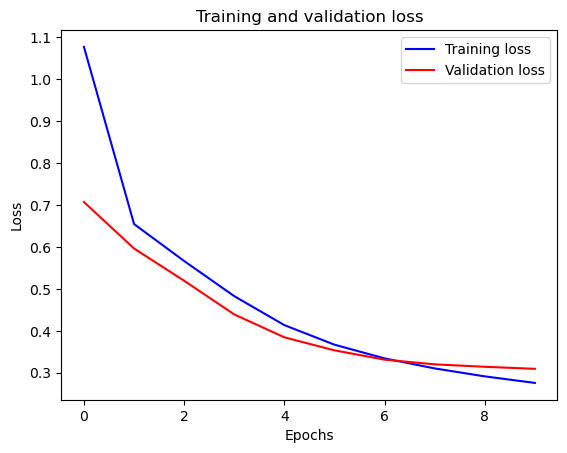

In [41]:
plt.plot(history.epoch, history.history['loss'], 'b', label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [42]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [43]:
loaded_model = tf.keras.models.load_model('saved_model', custom_objects={'RecipeTitleModel': RecipeTitleModel})

In [45]:
for input_example_batch, target_example_batch in train_ds.take(1):
    example_batch_predictions, example_states = loaded_model(input_example_batch, state=None, return_state=True)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")
    print(example_states.shape, "   # (batch_size, rnn_units)")

(64, 113, 80) # (batch_size, sequence_length, vocab_size)
(64, 1024)    # (batch_size, rnn_units)


In [46]:
class RecipeTitleGenerator:
    def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
        super().__init__()
        self.temperature = temperature
        self.model = model
        self.chars_from_ids = chars_from_ids
        self.ids_from_chars = ids_from_chars

        # Create a mask to prevent UNKNOWN from being generated.
        skip_ids = self.ids_from_chars([SpecialTokens.UNKNOWN])[:, None]
        sparse_mask = tf.SparseTensor(
            # Put a -inf at each bad index.
            values=[-float('inf')]*len(skip_ids),
            indices=skip_ids,
            # Match the shape to the vocabulary
            dense_shape=[len(ids_from_chars.get_vocabulary())])
        self.prediction_mask = tf.sparse.to_dense(sparse_mask)

        self.start_token_id = ids_from_chars.get_vocabulary().index(SpecialTokens.START)
        self.end_token_id = ids_from_chars.get_vocabulary().index(SpecialTokens.END)
    
    def generate_one_step(self, input_ids, state=None):
        # Run the model.
        # predicted_logits.shape is [batch, char, next_char_logits]
        predicted_logits, state = self.model(inputs=input_ids, state=state, return_state=True)
        # Only use the last prediction.
        predicted_logits = predicted_logits[:, -1, :]
        predicted_logits = predicted_logits/self.temperature
        # Apply the prediction mask: prevent "[UNK]" from being generated.
        predicted_logits = predicted_logits + self.prediction_mask

        # Sample the output logits to generate token IDs.
        predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)

        # Return the ids and model state.
        return predicted_ids, state
    
    def generate(self, prompt=None, max_tokens=200, prepend_start_token=True, repeats=1):
        next_id = None
        state = None
        
        if prepend_start_token:
            next_id = tf.constant(self.start_token_id, shape=(repeats, 1), dtype=tf.int64)
            next_id, state = self.generate_one_step(next_id, state=state)
        
        if prompt is not None:
            prompt_batch = tf.tile(prompt[None], multiples=[repeats])
            prompt_chars = tf.strings.unicode_split(prompt_batch, 'UTF-8').to_tensor()
            next_id = self.ids_from_chars(prompt_chars)
        
        result_ids = [next_id]

        done = tf.constant(False, shape=(repeats, 1))
        for n in range(max_tokens):
            next_id, state = self.generate_one_step(next_id, state=state)
            result_ids.append(next_id)
            done |= (next_id == self.end_token_id)
            if tf.math.reduce_all(done):
                break

        result_ids = tf.concat(result_ids, axis=-1)
        result_ids = self._trim_result_ids(result_ids)
        result_chars = self.chars_from_ids(result_ids)
        result = tf.strings.reduce_join(result_chars, axis=1)
        return result
    
    def _trim_result_ids(self, result_ids):
        end_token_indices = tf.where(result_ids == self.end_token_id)
        assert end_token_indices.shape[0] == result_ids.shape[0], 'One or more of the generated sequences have multiple [END] tokens.'
        end_token_index = end_token_indices[:, 1]
        result_ids = tf.RaggedTensor.from_tensor(result_ids, lengths=end_token_index)
        return result_ids

In [47]:
recipe_title_generator = RecipeTitleGenerator(loaded_model, chars_from_ids, ids_from_chars, temperature=1)

In [48]:
start = time.time()
prompt = tf.constant('Rice')
result = recipe_title_generator.generate(prompt)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor([b'Rice Pecan Slawlokes'], shape=(1,), dtype=string) 

________________________________________________________________________________

Run time: 0.5046858787536621


In [49]:
start = time.time()
prompt = tf.constant('Polenta')
result = recipe_title_generator.generate(prompt, repeats=10)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b'Polenta Rich (Ball Soup, and Fraised Shallots' b'Polenta'
 b'Polenta with Asparagus, Ovecchies, and Tomatoes'
 b'Polenta Gazuach-Watermelon Granita' b'Polenta with Sausages and Dried'
 b'Polenta Rampberry Jam' b'Polenta Garlic Rolls' b'Polenta Burger'
 b'Polenta with Pancetta, Bell, Rediy, and Bestlo-Egg Souch' b'Polenta'], shape=(10,), dtype=string) 

________________________________________________________________________________

Run time: 1.1828532218933105


In [50]:
start = time.time()
result = recipe_title_generator.generate(None, repeats=10)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b'Baked Peaches, Propeccoling and Curry Serrant Panne Sou'
 b'Lumbut Chorder Dit' b'Butalona'
 b'Grilled Zucchini Salad with Aprocot Duj' b'Firry Semmer Drussin Soup'
 b'Green Cupcake Green Okinish'
 b'Escarole Salad with Squash, Shallots and Cream'
 b'Grollin . -Leek Barberur Salad with Ryubanh'
 b'Green Christm Noorles with Radishes and Parsnips'
 b'Tender Tortal Barley Bungles'], shape=(10,), dtype=string) 

________________________________________________________________________________

Run time: 1.218597412109375
